# **Visualization of Network dataset using OpenTSNE**

### OpenTSNE is a modular Python implementation of t-Distributed Stochastic Neighbour Embedding (t-SNE), a popular dimensionality-reduction algorithm for visualising high-dimensional data sets. openTSNE incorporates the latest improvements to the t-SNE algorithm, including the ability to add new data points to existing embeddings .

### Installing necessary Libraries

In [ ]:
!pip install openTSNE
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

### Importing necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from openTSNE import TSNEEmbedding
from openTSNE import affinity
from openTSNE import initialization

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

scaler = StandardScaler()
km = KMeans(n_clusters=10, init='random', n_init=10, max_iter=10000, tol=1e-04, random_state=0)

## **Exploring and preprocessing the Time Series dataset**

In [ ]:
df=pd.read_parquet('AGG_GI_NE_NAME_5_MIN-DEST_NE_NAME-2022-10-04_00_00_00_2022-10-04_01_00_00.parquet')
df=df.sample(20000,replace=True)
df['min'] = df['ts'].dt.minute
df.shape

(20000, 64)

In [ ]:
df.sample(5)

,ts,DEST_NE_NAME,Procedure Count,TCP Syn Count,HTTP 1xx Count,HTTP 2xx Count,HTTP 3xx Count,HTTP 4xx Count,HTTP 5xx Count,Total Video Count,...,Total Data Volume (MB),Total Video GB,DL Throughput (kbps),UL Throughput (kbps),Average Video DL Throughput (kbps),Average Effective DL Throughput (kbps),Average Effective UL Throughput (kbps),Average Peak DL Throughput (kbps),Average Peak UL Throughput (kbps),min
397681,2022-10-04 00:50:00,MSK_eNB771152,512.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50
378163,2022-10-04 00:45:00,VLG_eNB0340137_VC,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45
231449,2022-10-04 00:30:00,CLB_eNB660007_MTS,212.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30
63341,2022-10-04 00:05:00,SCH_eNB233223_VC,1006.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
200055,2022-10-04 00:25:00,KRD_eNB0233316_VC,163.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25


In [ ]:
df['ts'].value_counts()

2022-10-04 00:10:00    1751
2022-10-04 00:15:00    1714
2022-10-04 00:40:00    1711
2022-10-04 00:35:00    1681
2022-10-04 00:00:00    1673
2022-10-04 00:55:00    1660
2022-10-04 00:50:00    1650
2022-10-04 00:25:00    1646
2022-10-04 00:45:00    1640
2022-10-04 00:05:00    1627
2022-10-04 00:30:00    1627
2022-10-04 00:20:00    1620
Name: ts, dtype: int64

In [ ]:
df['DEST_NE_NAME'].value_counts()

KMR_eNB421126        6
KIR_eNB322457_MTS    5
KLG_eNB0402636_VC    5
VOL_eNB220513_MTS    5
MSK_eNB773103        5
                    ..
RND_eNB611139        1
NNV_eNB305757_MTS    1
BRN_eNB222020        1
MSK_eNB774093        1
SPB_eNB781702        1
Name: DEST_NE_NAME, Length: 15634, dtype: int64

In [ ]:
df.isnull().sum()

ts                                        0
DEST_NE_NAME                              0
Procedure Count                           0
TCP Syn Count                             0
HTTP 1xx Count                            0
                                         ..
Average Effective DL Throughput (kbps)    0
Average Effective UL Throughput (kbps)    0
Average Peak DL Throughput (kbps)         0
Average Peak UL Throughput (kbps)         0
min                                       0
Length: 64, dtype: int64

In [ ]:
df['Procedure Count'].describe()

count    2.000000e+04
mean     8.962963e+02
std      1.620992e+04
min      0.000000e+00
25%      1.590000e+02
50%      3.180000e+02
75%      5.930000e+02
max      1.252918e+06
Name: Procedure Count, dtype: float64

In [ ]:
df.dtypes

ts                                        datetime64[ns]
DEST_NE_NAME                                      object
Procedure Count                                  float64
TCP Syn Count                                    float64
HTTP 1xx Count                                   float64
                                               ...      
Average Effective DL Throughput (kbps)           float64
Average Effective UL Throughput (kbps)           float64
Average Peak DL Throughput (kbps)                float64
Average Peak UL Throughput (kbps)                float64
min                                                int64
Length: 64, dtype: object

In [ ]:
corr=df.corr()
corr["Procedure Count"].sort_values(ascending=False)

Procedure Count                         1.000000
UL Data Volume (MB)                     0.967702
TCP Syn Count                           0.966846
Total Data Volume (MB)                  0.966286
DL Data Volume (MB)                     0.963091
                                          ...   
Total Poor Video Resolution Count            NaN
Total Video Resolution 4 Time (msec)         NaN
Poor Video Quality Ratio (%)                 NaN
Video No Play Ratio (%)                      NaN
Poor Video Resolution Ratio (%)              NaN
Name: Procedure Count, Length: 62, dtype: float64

In [ ]:
df=df[['DNS Failure Latency (msec)',
       'DNS Success Latency (msec)', 'Internet Latency (msec)',
       'Round Trip Time (msec)', 'HTTP Latency (msec)',
       'DL Data Volume (MB)', 'UL Data Volume (MB)',
       'DL Throughput (kbps)',
       'UL Throughput (kbps)','ts','DEST_NE_NAME','min']]

df_new = df
r = df[['ts','DEST_NE_NAME','min']]
s = scaler.fit_transform(df.drop(['ts','DEST_NE_NAME','min'],axis=1))
t = pd.DataFrame(s,columns=['DNS Failure Latency (msec)',
       'DNS Success Latency (msec)', 'Internet Latency (msec)',
       'Round Trip Time (msec)', 'HTTP Latency (msec)',
       'DL Data Volume (MB)', 'UL Data Volume (MB)',
       'DL Throughput (kbps)',
       'UL Throughput (kbps)'])
df = pd.concat([t.reset_index(drop=True),r.reset_index(drop=True)],axis=1)

## **OpenTSNE**

### Reference Embedding

In [ ]:
x = df[df["min"]==0]
z = df_new[df_new["min"]==0]
x = x.drop(['ts','DEST_NE_NAME','min'],axis=1)
x = x.to_numpy()

affinities_train = affinity.PerplexityBasedNN(
    x,
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=0,
    verbose=True,
)

init_train = initialization.pca(x, random_state=0)

embedding_train = TSNEEmbedding(
    init_train,
    affinities_train,
    negative_gradient_method="fft",
    n_jobs=8,
    verbose=True,
)

embedding_train_1 = embedding_train.optimize(n_iter=400, exaggeration=12, momentum=0.4)

embedding_train_2 = embedding_train_1.optimize(n_iter=800, momentum=0.7)

embedding_train_2 = embedding_train_2.optimize(n_iter=300, momentum=0.5)

dff0 = pd.DataFrame(embedding_train_2, columns = ['comp_1','comp_2'])
dff0 = pd.concat([dff0.reset_index(drop=True), z.reset_index(drop=True)],axis=1)

===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.86 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.09 seconds
===> Running optimization with exaggeration=12.00, lr=139.42 for 400 iterations...
Iteration   50, KL divergence 3.4021, 50 iterations in 1.1270 sec
Iteration  100, KL divergence 2.2341, 50 iterations in 0.9216 sec
Iteration  150, KL divergence 1.9520, 50 iterations in 0.9121 sec
Iteration  200, KL divergence 1.8335, 50 iterations in 1.8930 sec
Iteration  250, KL divergence 1.7696, 50 iterations in 1.3253 sec
Iteration  300, KL divergence 1.7309, 50 iterations in 0.9946 sec
Iteration  350, KL divergence 1.7050, 50 iterations in 0.9812 sec
Iteration  400, KL divergence 1.6863, 50 iterations in 1.1023 sec
   --> Time elapsed: 9.26 seconds
===> Running optimization with exaggeration=1.00, lr=1673.00 for 800 iterations...
Iteration   50, KL divergence 0.4674, 50 iterations in 1.5989 sec
Iteration

### Embedding new points in the reference embedding

In [ ]:
x_test = df[df["min"]==5]
z_test = df_new[df_new["min"]==5]
x_test = x_test.drop(['ts','DEST_NE_NAME','min'],axis=1)
x_test = x_test.to_numpy()

embedding_test = embedding_train_2.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)

embedding_test_1 = embedding_test.optimize(n_iter=300, learning_rate=0.1, momentum=0.8)

dff1 = pd.DataFrame(embedding_test_1, columns = ['comp_1','comp_2'])
dff1 = pd.concat([dff1.reset_index(drop=True),z_test.reset_index(drop=True)],axis=1)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.29 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.04 seconds
===> Running optimization with exaggeration=1.00, lr=0.10 for 300 iterations...
Iteration   50, KL divergence 19481.2506, 50 iterations in 0.0772 sec
Iteration  100, KL divergence 19248.5325, 50 iterations in 0.0608 sec
Iteration  150, KL divergence 19061.8088, 50 iterations in 0.0614 sec
Iteration  200, KL divergence 18902.6557, 50 iterations in 0.0683 sec
Iteration  250, KL divergence 18759.7516, 50 iterations in 0.0774 sec
Iteration  300, KL divergence 18628.9812, 50 iterations in 0.0606 sec
   --> Time elapsed: 0.41 seconds


In [ ]:
x_test = df[df["min"]==10]
z_test = df_new[df_new["min"]==10]
x_test = x_test.drop(['ts','DEST_NE_NAME','min'],axis=1)
x_test = x_test.to_numpy()

embedding_test = embedding_train_2.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)

embedding_test_1 = embedding_test.optimize(n_iter=300, learning_rate=0.1, momentum=0.8)

dff2 = pd.DataFrame(embedding_test_1, columns = ['comp_1','comp_2'])
dff2 = pd.concat([dff2.reset_index(drop=True),z_test.reset_index(drop=True)],axis=1)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.37 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.05 seconds
===> Running optimization with exaggeration=1.00, lr=0.10 for 300 iterations...
Iteration   50, KL divergence 15374.7407, 50 iterations in 0.1350 sec
Iteration  100, KL divergence 15356.8045, 50 iterations in 0.0974 sec
Iteration  150, KL divergence 15351.3562, 50 iterations in 0.0985 sec
Iteration  200, KL divergence 15347.8325, 50 iterations in 0.0745 sec
Iteration  250, KL divergence 15345.9764, 50 iterations in 0.0718 sec
Iteration  300, KL divergence 15344.4084, 50 iterations in 0.0659 sec
   --> Time elapsed: 0.55 seconds


In [ ]:
x_test = df[df["min"]==15]
z_test = df_new[df_new["min"]==15]
x_test = x_test.drop(['ts','DEST_NE_NAME','min'],axis=1)
x_test = x_test.to_numpy()

embedding_test = embedding_train_2.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)

embedding_test_1 = embedding_test.optimize(n_iter=300, learning_rate=0.1, momentum=0.8)

dff3 = pd.DataFrame(embedding_test_1, columns = ['comp_1','comp_2'])
dff3 = pd.concat([dff3.reset_index(drop=True),z_test.reset_index(drop=True)],axis=1)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.31 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=1.00, lr=0.10 for 300 iterations...
Iteration   50, KL divergence 15009.5486, 50 iterations in 0.0803 sec
Iteration  100, KL divergence 14988.2470, 50 iterations in 0.0739 sec
Iteration  150, KL divergence 14979.4442, 50 iterations in 0.0773 sec
Iteration  200, KL divergence 14974.3831, 50 iterations in 0.0660 sec
Iteration  250, KL divergence 14971.5163, 50 iterations in 0.0677 sec
Iteration  300, KL divergence 14969.0810, 50 iterations in 0.0624 sec
   --> Time elapsed: 0.43 seconds


In [ ]:
x_test = df[df["min"]==20]
z_test = df_new[df_new["min"]==20]
x_test = x_test.drop(['ts','DEST_NE_NAME','min'],axis=1)
x_test = x_test.to_numpy()

embedding_test = embedding_train_2.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)

embedding_test_1 = embedding_test.optimize(n_iter=300, learning_rate=0.1, momentum=0.8)

dff4 = pd.DataFrame(embedding_test_1, columns = ['comp_1','comp_2'])
dff4 = pd.concat([dff4.reset_index(drop=True),z_test.reset_index(drop=True)],axis=1)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.29 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.04 seconds
===> Running optimization with exaggeration=1.00, lr=0.10 for 300 iterations...
Iteration   50, KL divergence 14121.3946, 50 iterations in 0.0688 sec
Iteration  100, KL divergence 14103.9509, 50 iterations in 0.0612 sec
Iteration  150, KL divergence 14096.5441, 50 iterations in 0.0728 sec
Iteration  200, KL divergence 14091.7152, 50 iterations in 0.0891 sec
Iteration  250, KL divergence 14088.3486, 50 iterations in 0.1027 sec
Iteration  300, KL divergence 14086.3683, 50 iterations in 0.1179 sec
   --> Time elapsed: 0.52 seconds


In [ ]:
x_test = df[df["min"]==25]
z_test = df_new[df_new["min"]==25]
x_test = x_test.drop(['ts','DEST_NE_NAME','min'],axis=1)
x_test = x_test.to_numpy()

embedding_test = embedding_train_2.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)

embedding_test_1 = embedding_test.optimize(n_iter=300, learning_rate=0.1, momentum=0.8)

dff5 = pd.DataFrame(embedding_test_1, columns = ['comp_1','comp_2'])
dff5 = pd.concat([dff5.reset_index(drop=True),z_test.reset_index(drop=True)],axis=1)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.49 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.03 seconds
===> Running optimization with exaggeration=1.00, lr=0.10 for 300 iterations...
Iteration   50, KL divergence 14392.3405, 50 iterations in 0.0981 sec
Iteration  100, KL divergence 14371.0310, 50 iterations in 0.1145 sec
Iteration  150, KL divergence 14363.3560, 50 iterations in 0.1184 sec
Iteration  200, KL divergence 14359.8287, 50 iterations in 0.1156 sec
Iteration  250, KL divergence 14357.7002, 50 iterations in 0.1694 sec
Iteration  300, KL divergence 14354.9905, 50 iterations in 0.2181 sec
   --> Time elapsed: 0.84 seconds


In [ ]:
x_test = df[df["min"]==30]
z_test = df_new[df_new["min"]==30]
x_test = x_test.drop(['ts','DEST_NE_NAME','min'],axis=1)
x_test = x_test.to_numpy()

embedding_test = embedding_train_2.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)

embedding_test_1 = embedding_test.optimize(n_iter=300, learning_rate=0.1, momentum=0.8)

dff6 = pd.DataFrame(embedding_test_1, columns = ['comp_1','comp_2'])
dff6 = pd.concat([dff6.reset_index(drop=True),z_test.reset_index(drop=True)],axis=1)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.98 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.03 seconds
===> Running optimization with exaggeration=1.00, lr=0.10 for 300 iterations...
Iteration   50, KL divergence 14188.4232, 50 iterations in 0.1027 sec
Iteration  100, KL divergence 14171.9867, 50 iterations in 0.1181 sec
Iteration  150, KL divergence 14165.0091, 50 iterations in 0.0654 sec
Iteration  200, KL divergence 14160.8325, 50 iterations in 0.0609 sec
Iteration  250, KL divergence 14157.1916, 50 iterations in 0.0600 sec
Iteration  300, KL divergence 14154.1574, 50 iterations in 0.0795 sec
   --> Time elapsed: 0.49 seconds


In [ ]:
x_test = df[df["min"]==35]
z_test = df_new[df_new["min"]==35]
x_test = x_test.drop(['ts','DEST_NE_NAME','min'],axis=1)
x_test = x_test.to_numpy()

embedding_test = embedding_train_2.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)

embedding_test_1 = embedding_test.optimize(n_iter=300, learning_rate=0.1, momentum=0.8)

dff7 = pd.DataFrame(embedding_test_1, columns = ['comp_1','comp_2'])
dff7 = pd.concat([dff7.reset_index(drop=True),z_test.reset_index(drop=True)],axis=1)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.29 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=1.00, lr=0.10 for 300 iterations...
Iteration   50, KL divergence 14696.1664, 50 iterations in 0.0644 sec
Iteration  100, KL divergence 14676.0808, 50 iterations in 0.0640 sec
Iteration  150, KL divergence 14666.5573, 50 iterations in 0.0676 sec
Iteration  200, KL divergence 14660.6864, 50 iterations in 0.0690 sec
Iteration  250, KL divergence 14656.8496, 50 iterations in 0.0605 sec
Iteration  300, KL divergence 14654.1198, 50 iterations in 0.0603 sec
   --> Time elapsed: 0.39 seconds


In [ ]:
x_test = df[df["min"]==40]
z_test = df_new[df_new["min"]==40]
x_test = x_test.drop(['ts','DEST_NE_NAME','min'],axis=1)
x_test = x_test.to_numpy()

embedding_test = embedding_train_2.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)

embedding_test_1 = embedding_test.optimize(n_iter=300, learning_rate=0.1, momentum=0.8)

dff8 = pd.DataFrame(embedding_test_1, columns = ['comp_1','comp_2'])
dff8 = pd.concat([dff8.reset_index(drop=True),z_test.reset_index(drop=True)],axis=1)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.34 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=1.00, lr=0.10 for 300 iterations...
Iteration   50, KL divergence 15006.1512, 50 iterations in 0.0716 sec
Iteration  100, KL divergence 14982.0661, 50 iterations in 0.0635 sec
Iteration  150, KL divergence 14972.7803, 50 iterations in 0.0842 sec
Iteration  200, KL divergence 14969.1791, 50 iterations in 0.0636 sec
Iteration  250, KL divergence 14967.1460, 50 iterations in 0.0631 sec
Iteration  300, KL divergence 14965.1944, 50 iterations in 0.0629 sec
   --> Time elapsed: 0.41 seconds


In [ ]:
x_test = df[df["min"]==45]
z_test = df_new[df_new["min"]==45]
x_test = x_test.drop(['ts','DEST_NE_NAME','min'],axis=1)
x_test = x_test.to_numpy()

embedding_test = embedding_train_2.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)

embedding_test_1 = embedding_test.optimize(n_iter=300, learning_rate=0.1, momentum=0.8)

dff9 = pd.DataFrame(embedding_test_1, columns = ['comp_1','comp_2'])
dff9 = pd.concat([dff9.reset_index(drop=True),z_test.reset_index(drop=True)],axis=1)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.32 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=1.00, lr=0.10 for 300 iterations...
Iteration   50, KL divergence 14319.1746, 50 iterations in 0.0677 sec
Iteration  100, KL divergence 14300.1587, 50 iterations in 0.0693 sec
Iteration  150, KL divergence 14293.5063, 50 iterations in 0.0743 sec
Iteration  200, KL divergence 14289.9091, 50 iterations in 0.0617 sec
Iteration  250, KL divergence 14286.9710, 50 iterations in 0.0604 sec
Iteration  300, KL divergence 14284.0216, 50 iterations in 0.0612 sec
   --> Time elapsed: 0.40 seconds


In [ ]:
x_test = df[df["min"]==50]
z_test = df_new[df_new["min"]==50]
x_test = x_test.drop(['ts','DEST_NE_NAME','min'],axis=1)
x_test = x_test.to_numpy()

embedding_test = embedding_train_2.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)

embedding_test_1 = embedding_test.optimize(n_iter=300, learning_rate=0.1, momentum=0.8)

dff10 = pd.DataFrame(embedding_test_1, columns = ['comp_1','comp_2'])
dff10 = pd.concat([dff10.reset_index(drop=True),z_test.reset_index(drop=True)],axis=1)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.33 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.03 seconds
===> Running optimization with exaggeration=1.00, lr=0.10 for 300 iterations...
Iteration   50, KL divergence 14362.8849, 50 iterations in 0.0984 sec
Iteration  100, KL divergence 14344.6795, 50 iterations in 0.1081 sec
Iteration  150, KL divergence 14337.6441, 50 iterations in 0.1435 sec
Iteration  200, KL divergence 14333.2421, 50 iterations in 0.1073 sec
Iteration  250, KL divergence 14329.8788, 50 iterations in 0.1054 sec
Iteration  300, KL divergence 14326.5125, 50 iterations in 0.1599 sec
   --> Time elapsed: 0.73 seconds


In [ ]:
x_test = df[df["min"]==55]
z_test = df_new[df_new["min"]==55]
x_test = x_test.drop(['ts','DEST_NE_NAME','min'],axis=1)
x_test = x_test.to_numpy()

embedding_test = embedding_train_2.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)

embedding_test_1 = embedding_test.optimize(n_iter=300, learning_rate=0.1, momentum=0.8)

dff11 = pd.DataFrame(embedding_test_1, columns = ['comp_1','comp_2'])
dff11 = pd.concat([dff11.reset_index(drop=True),z_test.reset_index(drop=True)],axis=1)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.58 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.03 seconds
===> Running optimization with exaggeration=1.00, lr=0.10 for 300 iterations...
Iteration   50, KL divergence 14486.4088, 50 iterations in 0.2741 sec
Iteration  100, KL divergence 14470.7887, 50 iterations in 0.1279 sec
Iteration  150, KL divergence 14464.9977, 50 iterations in 0.2435 sec
Iteration  200, KL divergence 14461.7358, 50 iterations in 0.2226 sec
Iteration  250, KL divergence 14459.7425, 50 iterations in 0.3239 sec
Iteration  300, KL divergence 14458.3350, 50 iterations in 0.2323 sec
   --> Time elapsed: 1.44 seconds


In [ ]:
df_final = pd.concat([dff0, dff1, dff2, dff3, dff4, dff5, dff6, dff7, dff8, dff9, dff10, dff11],axis=0)

df_final.sort_values(by="min",ascending=True,inplace=True)

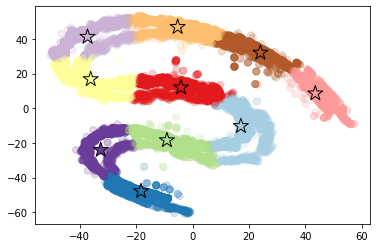

In [ ]:
y_km = km.fit_predict(df_final[['comp_1','comp_2']])
plt.scatter(df_final['comp_1'], df_final['comp_2'], c=y_km, s=50, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1], 
        s=250, marker='*', label='centroids',
        edgecolor='black',
       c=np.arange(0,10),cmap=plt.cm.Paired,)

# **Interactive visualization**

In [ ]:
properties=['None', 'DNS Failure Latency (msec)', 'DNS Success Latency (msec)', 'Internet Latency (msec)', 'Round Trip Time (msec)', 'HTTP Latency (msec)', 'DL Data Volume (MB)', 'UL Data Volume (MB)']

def f(Features, Time):
    dff = df_final[df_final["min"]==Time]
    y_km = km.fit_predict(dff[['comp_1','comp_2']])

    if Features == 'None':
        fig, ax = plt.subplots(figsize=(20, 16))
        plt.scatter(dff['comp_1'], dff['comp_2'], c=y_km ,s=50, cmap=plt.cm.Paired, alpha=0.7)
        plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],s=250, marker='*', label='centroids', edgecolor='black', c=np.arange(0,10), cmap=plt.cm.Paired,)
        fig.show()
    else:
        fig, ax = plt.subplots(figsize=(20, 16))
        sc=plt.scatter(dff['comp_1'], dff['comp_2'], c=dff[Features] ,s=50, cmap='Wistia', alpha=1)
        ax.legend(*sc.legend_elements(), title='clusters')
        plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', label='centroids', edgecolor='black', c=np.arange(0,10), cmap=plt.cm.Paired,) 
        fig.show()

In [ ]:
a = widgets.IntSlider(min=0, max=55, step=5, value=0)

interact(f, Features = properties, Time = a)

interactive(children=(Dropdown(description='Features', options=('None', 'DNS Failure Latency (msec)', 'DNS Suc…

<function __main__.f(Features, Time)>